In [2]:
getwd()

[1] "/GPFS/Magda_lab_temp/dongmingjie/Project-1/scATAC/My_Code"

In [ ]:
library(ArchR)
library(Cairo)
addArchRThreads(threads = 1)

path <- "/GPFS/Magda_lab_temp/dongmingjie/Project-1/scATAC/"
setwd(path)

proj_5       <- loadArchRProject(path = paste0(path,"/proj_5"), force = FALSE, showLogo = TRUE)

In [40]:

# preorpost
# proj_5@cellColData@listData[["preorpost"]]  <- proj_5@cellColData@rownames
# proj_5@cellColData@listData[["preorpost"]]  <- gsub(".*Pre.*" ,"Pre" ,proj_5@cellColData@listData[["preorpost"]] )
# proj_5@cellColData@listData[["preorpost"]]  <- gsub(".*Post.*","Post",proj_5@cellColData@listData[["preorpost"]] )
table(proj_5@cellColData@listData[["preorpost"]])
pal_preorpost <- paletteDiscrete(values = proj_5@cellColData$preorpost)
pal_preorpost <- gsub('#272E6A','#F8766D',pal_preorpost)
pal_preorpost <- gsub('#D51F26','#00BFC4',pal_preorpost)
pal_preorpost

# Sample
table(proj_5@cellColData$Sample)
pal_Sample<-c("#A1A9D0","#A1A9D0",# SU001_Post,SU001_Post2
              "#F0988C",# SU006_Pre
              "#B883D4","#B883D4",# SU008_Post,SU008_Pre
              "#CFEAF1","#CFEAF1")# SU009_Post,SU009_Pre
names(pal_Sample)[1] <- 'SU001_Post'
names(pal_Sample)[2] <- 'SU001_Post2'
names(pal_Sample)[3] <- 'SU006_Pre'
names(pal_Sample)[4] <- 'SU008_Post'
names(pal_Sample)[5] <- 'SU008_Pre'
names(pal_Sample)[6] <- 'SU009_Post'
names(pal_Sample)[7] <- 'SU009_Pre'
pal_Sample

# celltype
pal_celltype <- c(
  '#D51F26',
  '#272E6A',
  '#208A42',
  '#89288F',
  '#F47D2B',
  '#FEE500',
  '#8A9FD1',
  '#C06CAB',
  '#D8A767')
names(pal_celltype)[1] <- 'CD8_act'
names(pal_celltype)[2] <- 'CD8_eff'
names(pal_celltype)[3] <- 'CD8_ex'
names(pal_celltype)[4] <- 'CD8_ex_act'
names(pal_celltype)[5] <- 'CD8_mem'
names(pal_celltype)[6] <- 'Naive'
names(pal_celltype)[7] <- 'Tfh'
names(pal_celltype)[8] <- 'Th17'
names(pal_celltype)[9] <- 'Tregs'
pal_celltype

# cellcondition
pal_cellcondition <- c('CD8_act_Post'   = '#D51F26',
                       'CD8_act_Pre'    = '#F59F9D',   
                       'CD8_eff_Post'   = '#272E6A',
                       'CD8_eff_Pre'    = '#9DA1C8',
                       'CD8_ex_act_Post'= '#208A42',
                       'CD8_ex_act_Pre' = '#9DE9B9',
                       'CD8_ex_Post'    = '#89288F',
                       'CD8_ex_Pre'     = '#D2A9D8',
                       'CD8_mem_Post'   = '#F47D2B',
                       'CD8_mem_Pre'    = '#F9B986',

                       'Naive_Post'     = '#FEE500',
                       'Naive_Pre'      = '#FEF5A4', 
                       'Tfh_Post'       = '#8A9FD1', 
                       'Tfh_Pre'        = '#C0CCEB',  
                       'Th17_Post'      = '#C06CAB',   
                       'Th17_Pre'       = '#E0A4C7',   
                       'Tregs_Post'     = '#D8A767',  
                       'Tregs_Pre'      = '#EFCFA2')
pal_cellcondition


 Post   Pre 
22178 10573 

Post       Pre 
"#00BFC4" "#F8766D"


 SU001_Post SU001_Post2   SU006_Pre  SU008_Post   SU008_Pre  SU009_Post 
       5059        2193        1357        4618        3114       10308 
  SU009_Pre 
       6102 

SU001_Post SU001_Post2   SU006_Pre  SU008_Post   SU008_Pre  SU009_Post 
  "#A1A9D0"   "#A1A9D0"   "#F0988C"   "#B883D4"   "#B883D4"   "#CFEAF1" 
  SU009_Pre 
  "#CFEAF1"

CD8_act    CD8_eff     CD8_ex CD8_ex_act    CD8_mem      Naive        Tfh 
 "#D51F26"  "#272E6A"  "#208A42"  "#89288F"  "#F47D2B"  "#FEE500"  "#8A9FD1" 
      Th17      Tregs 
 "#C06CAB"  "#D8A767"

CD8_act_Post     CD8_act_Pre    CD8_eff_Post     CD8_eff_Pre CD8_ex_act_Post 
      "#D51F26"       "#F59F9D"       "#272E6A"       "#9DA1C8"       "#208A42" 
 CD8_ex_act_Pre     CD8_ex_Post      CD8_ex_Pre    CD8_mem_Post     CD8_mem_Pre 
      "#9DE9B9"       "#89288F"       "#D2A9D8"       "#F47D2B"       "#F9B986" 
     Naive_Post       Naive_Pre        Tfh_Post         Tfh_Pre       Th17_Post 
      "#FEE500"       "#FEF5A4"       "#8A9FD1"       "#C0CCEB"       "#C06CAB" 
       Th17_Pre      Tregs_Post       Tregs_Pre 
      "#E0A4C7"       "#D8A767"       "#EFCFA2"

In [41]:
dim(proj_5@cellColData)

t(as.data.frame(head(proj_5@cellColData)[1:3,c(1:28)]))

[1] 32751    99

,SU009_Post#CACAACAAGATGAGGA-1,SU009_Post#GCTTAAGGTCATTGGT-1,SU009_Post#GGATAGGTCGGGACAA-1
Sample,SU009_Post,SU009_Post,SU009_Post
TSSEnrichment,1.117,2.086,19.258
ReadsInTSS,501,1148,16922
ReadsInPromoter,4018,8649,59305
ReadsInBlacklist,3293,2109,1945
PromoterRatio,0.02024732,0.04710733,0.33174653
PassQC,1,1,1
NucleosomeRatio,0.3607104,0.5424073,0.8857173
nMultiFrags,5194,9831,9993
nMonoFrags,72920,59518,47400


In [7]:
#proj_5@cellColData$patients <- proj_5@cellColData$Sample
#proj_5@cellColData$patients <- gsub('_Post','',proj_5@cellColData$patients)
#proj_5@cellColData$patients <- gsub('_Pre','',proj_5@cellColData$patients)

### plotEmbedding

In [5]:
p <- plotEmbedding(proj_5,
                   colorBy   = "cellColData",
                   name      = "cellcondition",
                   pal       = pal_cellcondition,
                   embedding = "UMAPHarmony")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-59211361df6a2-Date-2024-03-27_Time-10-01-36.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-59211361df6a2-Date-2024-03-27_Time-10-01-36.log



In [6]:
plotPDF(p, name = "Plot-UMAP-RNA-Integration.pdf", ArchRProj = proj_5, addDOC = FALSE, width = 5, height = 5)

Plotting Ggplot!



### FeaturePlot

In [6]:
markerGenes <- c(
  # 5 resident markers 
  'RUNX3', 'NR4A1', 'CD69', 'CXCR6','NR4A3',
  # 8 cytotoxicity associated genes
  'PRF1','IFNG', 'GNLY', 'NKG7', 'GZMB', 'GZMA', 'CST7','TNFSF10',
  # 5 exhausted markers 
  'CTLA4', 'HAVCR2', 'LAG3', 'PDCD1', 'TIGIT',
  # 6 costimulatory molecular genes
  'ICOS', 'CD226', 'TNFRSF14', 'TNFRSF25', 'TNFRSF9', 'CD28',
  # 2 Immuotherapy Response genes
    'CD274','PDCD1',
  # T cell 衰竭关键介质
    'NR4A1','NR4A2'
)

In [42]:
markerGenes <- c("CXCL9","CCL5")

In [ ]:
proj_5 <- addImputeWeights(proj_5)

In [43]:
p4_B      <- plotEmbedding(ArchRProj = proj_5,colorBy = "GeneScoreMatrix", 
                           name = markerGenes, embedding = "UMAPHarmony",
                           quantCut = c(0.01, 0.95),
                           imputeWeights = getImputeWeights(proj_5))

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3b47779b6fb4e-Date-2024-04-25_Time-19-08-21.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-04-25 19:08:42 : 

1 
2 
3 
4 
5 
6 
7 


Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3b47779b6fb4e-Date-2024-04-25_Time-19-08-21.log



In [44]:
# 所有基因
p4_C <- lapply(p4_B, function(x){
  x + guides(color = NULL, fill = NULL) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
      axis.text.x=element_blank(), 
      axis.ticks.x=element_blank(), 
      axis.text.y=element_blank(), 
      axis.ticks.y=element_blank()
    )})

$CXCL9

$CCL5


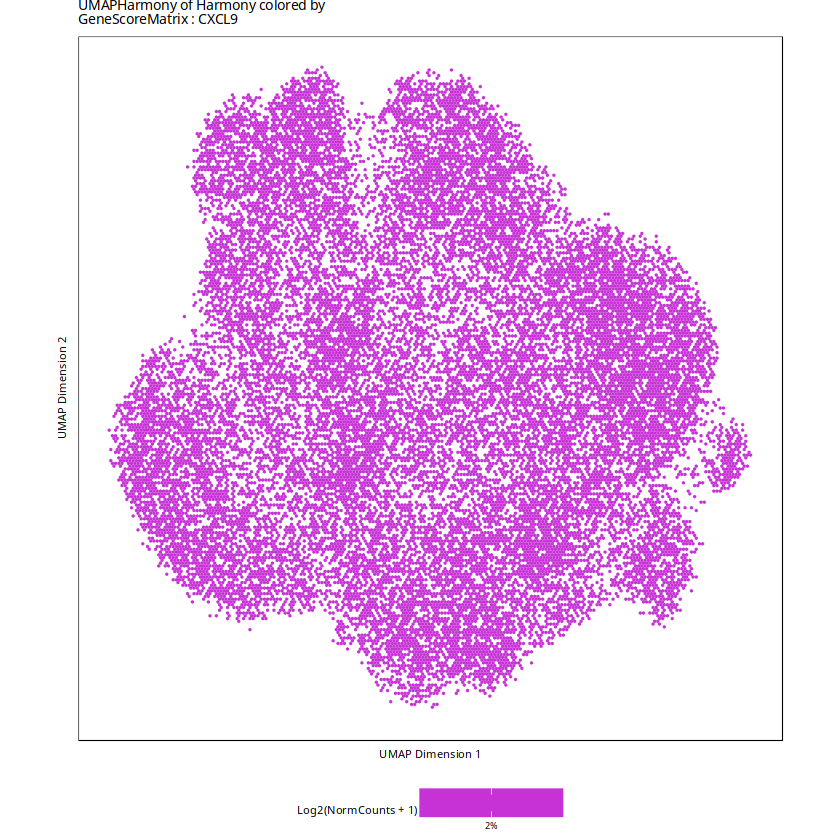

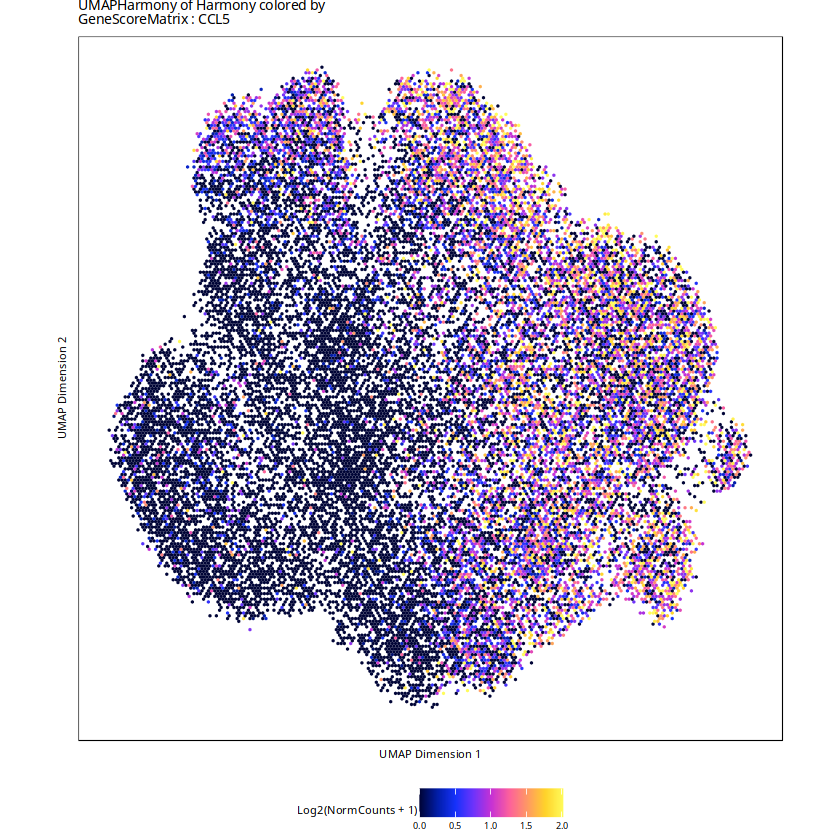

In [45]:
p4_C

In [ ]:
plotPDF(plotList = p4_C, 
        name =      "0805.Plot-MarkerGenes-WO-Imputation.pdf", 
        ArchRProj = proj_5, 
        addDOC = FALSE, width = 5, height = 5)

### scATAC-predictedGroup-Clusters.png

In [33]:
table(proj_5@cellColData$predictedGroup,proj_5@cellColData$preorpost)

            
             Post  Pre
  CD8_act     173  182
  CD8_eff     704  266
  CD8_ex     2830  424
  CD8_ex_act  280   24
  CD8_mem    3461 1956
  Naive      3777 2761
  Tfh        4434 1233
  Th17       3514 2400
  Tregs      3005 1327

In [34]:
table(proj_5@cellColData$patients)


 SU001 SU0012  SU006  SU008  SU009 
  5059   2193   1357   7732  16410 

In [35]:
proj_5$Clusters <- factor(proj_5$Clusters,levels=c(
    'C1','C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24','C25'))

In [4]:
table(proj_5$Clusters)
table(proj_5$cellcondition)


  C1  C10  C11  C12  C13  C14  C15  C16  C17  C18  C19   C2  C20  C21  C22  C23 
1584 1097  529  938 2358 1527 1697  394 1826 3871  546 1137  583  999  312 1324 
 C24  C25   C3   C4   C5   C6   C7   C8   C9 
2092  585 2399 1518  366  987 3479  203  400 


   CD8_act_Post     CD8_act_Pre    CD8_eff_Post     CD8_eff_Pre CD8_ex_act_Post 
            173             182             704             266             280 
 CD8_ex_act_Pre     CD8_ex_Post      CD8_ex_Pre    CD8_mem_Post     CD8_mem_Pre 
             24            2830             424            3461            1956 
     Naive_Post       Naive_Pre        Tfh_Post         Tfh_Pre       Th17_Post 
           3777            2761            4434            1233            3514 
       Th17_Pre      Tregs_Post       Tregs_Pre 
           2400            3005            1327 

In [38]:
df <- table(proj_5$predictedGroup,proj_5$Clusters)

In [39]:
df

            
               C1  C10  C11  C12  C13  C14  C15  C16  C17  C18  C19   C2  C20
  CD8_act       0   58    2    6   14    0    0    0    0    0  262    0    0
  CD8_eff       0  938    1    2    5    0    0    0    0    0    4    0    0
  CD8_ex        0    4  485  682 2053    0    0    0    0    0   12    0    0
  CD8_ex_act    0    1   30   33  183    0    0    0    0    0    0    0    0
  CD8_mem       0   96   11  215  103    0    0    0    0    0  268    0    0
  Naive       170    0    0    0    0    2   18  118   17 1364    0  599   14
  Tfh          32    0    0    0    0 1473 1626  139  164  755    0   53   32
  Th17       1370    0    0    0    0   50   36   46 1582 1293    0  468  410
  Tregs        12    0    0    0    0    2   17   91   63  459    0   17  127
            
              C21  C22  C23  C24  C25   C3   C4   C5   C6   C7   C8   C9
  CD8_act       0    0    0    0    0    0    0    1    0   12    0    0
  CD8_eff       0    0    0    0    0    0    0 

In [42]:
colnames(df)

[1] "C1"  "C10" "C11" "C12" "C13" "C14" "C15" "C16" "C17" "C18" "C19" "C2" 
[13] "C20" "C21" "C22" "C23" "C24" "C25" "C3"  "C4"  "C5"  "C6"  "C7"  "C8" 
[25] "C9"

In [43]:
df <- df[, c('C1','C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24','C25')]

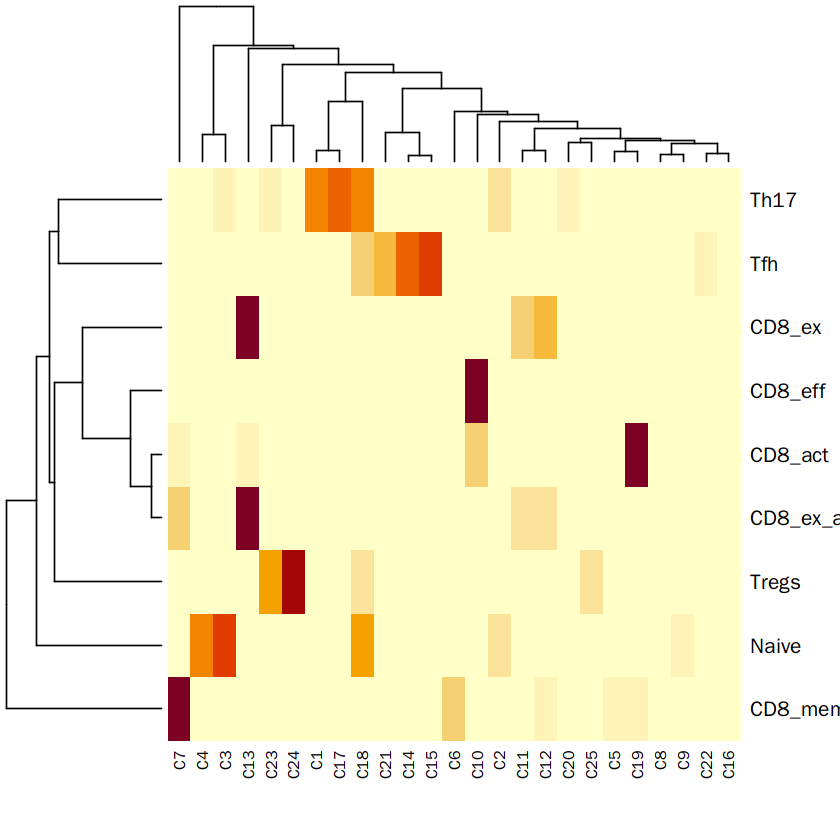

In [41]:
row(df) <- factor(colnames(df),levels=c(
    'C1','C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24','C25'))
heatmap(df)

### Peak-to-gene 热图

In [46]:
markerGenes <- unique(c(
  'CD3G', 'CD3D', 'CD3E',			# T cells
  
  'CD4',						# CD4+ T cells
  'IL2RA','FOXP3','CTLA4',			# Treg cells
  'TBX21','IFNG',					# Th1 cells
  'IL4','GATA3',					# Th2 cells
  'IL9','SPI1',					# Th9 cells
  'TGFB1','RORC','IL17A','IL17F','IL26','CCR6','KLRB1','CTSH',	# Th17
  'IL22','AHR','IL13',				# Th22
  'CXCR5','IL21','BCL6','CD200','IL26','CD200','PTPN13','BTLA',	# Tfh
  
  'CD8A', 'GZMA',					# CD8+ T cells
  'CD69','IL2RA','TNF','IFNG','FOS','JUN',	# Activated
  'GZMB','PRF1',						# Cytotoxic
  'PTPRC','SELL','CCR7',				# Naive+++/Effector、Memory+--
  'EOMES','GZMK','CXCR3',				# Memory
  'KLRD1',							# Effect Memory
  'IL7R'  ,'CCR7',					# Naive CD4+ T
  'IL7R'  ,'S100A4',					# Memory CD4+ T
  'PDCD1','HAVCR2',					# T cell exhaustion genes
  'IFNG','TNF' ,						# T cell activation genes
  'ENTPD1', 'ITGAE',					# 'CD39','CD103' Exhausted CD8+ T cells
  'TCF7','PDCD1','HAVCR2',				# Progenitor Exhausted Tcell
  'TOX','TOX2','PDCD1','TIGIT',			# Terminally Exhausted Tcell
  
  
  'KLRC1', 'KLRC3','GNLY','NKG7',		# NK cells
  'CD19',  'CD79A','MS4A1',			# B cells
  'SLAMF7',						# plasma cells (IGKC)
  'CLEC4C',						# plasmacytoid dendritic cells
  'COL1A2',						# fibroblasts
  'MCAM', 'MYLK',					# myofibroblasts
  'PECAM1', 'VWF',				# endothelial cells
  'PMEL', 'MLANA',				# melanocytes
  'EPCAM','BCAM','TP63',			# BCC (malignant cells)
  
  # 5 resident markers 
  'RUNX3', 'NR4A1', 'CD69', 'CXCR6','NR4A3',
  # 7 cytotoxicity associated genes
  'IFNG', 'GNLY', 'NKG7', 'GZMB', 'GZMA', 'CST7','TNFSF10',
  # 5 exhausted markers 
  'CTLA4', 'HAVCR2', 'LAG3', 'PDCD1', 'TIGIT',
  # 6 costimulatory molecular genes
  'ICOS', 'CD226', 'TNFRSF14', 'TNFRSF25', 'TNFRSF9', 'CD28'
  
  #'CD14'  ,'LYZ',				# CD14+ Mono
  #'FCGR3A','MS4A7',			  	# FCGR3A+ Mono
  #'FAP', 'PDPN',				    	# cancer-associated fibroblasts
  #'FCGR2A', 'CSF1R',			  	# macrophages
  #'FLT3','FCER1A','CST3' ,			# dendritic cells
  #'PPBP',						      # Platelet
  #'CD34',						      # Early Progenitor
  #'GATA1'						      # Erythrocyte
))

In [ ]:
table(proj_5$predictedGroup,proj_5$cellcondition)

In [ ]:
# Peak2GeneLinkages分析
proj_5 <- addPeak2GeneLinks(ArchRProj = proj_5,reducedDims = "Harmony")

p <- plotBrowserTrack(
  ArchRProj = proj_5, 
  groupBy = "predictedGroup", 
  geneSymbol = markerGenes, 
  upstream = 50000,
  downstream = 50000,
  loops = getPeak2GeneLinks(proj_5))

plotPDF(plotList = p, 
        name = "15.Plot-Tracks-Marker-Genes-with-Peak2GeneLinks.pdf", 
        ArchRProj = proj_4, 
        addDOC = FALSE, width = 5, height = 8)

In [ ]:
# 绘制Peak-to-gene连接热图
p <- plotPeak2GeneHeatmap(ArchRProj = proj_5, groupBy = "predictedGroup")

plotPDF(p, name = "Add.Peak2GeneHeatmap-predictedGroup.pdf", ArchRProj = proj_5, addDOC = FALSE, width = 8, height = 10)

In [ ]:
# 绘制Peak-to-gene连接热图
p <- plotPeak2GeneHeatmap(ArchRProj = proj_5, groupBy = "cellcondition")

plotPDF(p, name = "Add.Peak2GeneHeatmap-cellcondition.pdf", ArchRProj = proj_5, addDOC = FALSE, width = 8, height = 10)

In [ ]:
saveArchRProject(ArchRProj = proj_5, outputDirectory = "proj_5", load = FALSE)

### Peak-Marker-Heatmap

In [ ]:
markersPeaks <- getMarkerFeatproj_5$hRProj  = proj_5, 
  useMatrix  = "PeakMatrix", 
  groupBy    = "predictedGroup",
  bias       = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "wilcoxon")

In [5]:
saveRDS(markersPeaks,'My_Data/scATAC_Data_markersPeaks_predictedGroup.rds')
markersPeaks <- readRDS('My_Data/scATAC_Data_markersPeaks_predictedGroup.rds')
#markersPeaks <- readRDS('My_Data/scATAC_Data_markersPeaks_cellcondition.rds')

In [8]:
markerList_GR <- getMarkers(markersPeaks, cutOff = "FDR <= 0.01 & Log2FC >= 1", returnGR = TRUE)

In [ ]:
p <- plotMarkerHeatmap(seMarker = markersPeaks, cutOff = "FDR <= 0.0001 & Log2FC >= 3 & MeanDiff >= 1",transpose = TRUE)

In [ ]:
plotPDF(p, name = "Plus.Peak-Marker-Heatmap_predictedGroup", width = 20, height = 6, ArchRProj = proj_5, addDOC = FALSE)

### [9.Motifs-Enriched-Marker-Heatmap_20.pdf]❌

In [8]:
markersPeaks <- readRDS('My_Data/scATAC_Data_markersPeaks_predictedGroup.rds')


In [ ]:
enrichMotifs <- peakAnnoEnrichment(
  seMarker       = markersPeaks,
  ArchRProj      = proj_5,
  peakAnnotation = "Motif",
  cutOff = "FDR <= 0.1 & Log2FC >= 0.5"
)

In [22]:
saveRDS(enrichMotifs,"My_Data/scATAC_Data_enrichMotifs_predictedGroup.rds")
enrichMotifs <- readRDS('My_Data/scATAC_Data_enrichMotifs_predictedGroup.rds')
enrichMotifs

class: SummarizedExperiment 
dim: 870 9 
metadata(0):
assays(10): mlog10Padj mlog10p ... CompareFrequency feature
rownames(870): TFAP2B_1 TFAP2D_2 ... TBX18_869 TBX22_870
rowData names(0):
colnames(9): CD8_act CD8_eff ... Th17 Tregs
colData names(0):

In [9]:
enrichMotifs <- peakAnnoEnrichment(
  seMarker = markersPeaks,
  ArchRProj = proj_5,
  peakAnnotation = NULL,
  matches = NULL,
  cutOff = "FDR <= 0.1 & Log2FC >= 0.5",
  background = "all",
  logFile = createLogFile("peakAnnoEnrichment")
)

ArchR logging to : ArchRLogs/ArchR-peakAnnoEnrichment-3e4cc417e9c0a-Date-2023-07-08_Time-09-59-31.log
If there is an issue, please report to github with logFile!

2023-07-08 09:59:37 : Computing Enrichments 1 of 9, 0.096 mins elapsed.

2023-07-08 09:59:37 : Computing Enrichments 2 of 9, 0.101 mins elapsed.

2023-07-08 09:59:37 : Computing Enrichments 3 of 9, 0.108 mins elapsed.

2023-07-08 09:59:38 : Computing Enrichments 4 of 9, 0.114 mins elapsed.

2023-07-08 09:59:38 : Computing Enrichments 5 of 9, 0.12 mins elapsed.

2023-07-08 09:59:38 : Computing Enrichments 6 of 9, 0.126 mins elapsed.

2023-07-08 09:59:39 : Computing Enrichments 7 of 9, 0.139 mins elapsed.

2023-07-08 09:59:40 : Computing Enrichments 8 of 9, 0.145 mins elapsed.

2023-07-08 09:59:40 : Computing Enrichments 9 of 9, 0.151 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-peakAnnoEnrichment-3e4cc417e9c0a-Date-2023-07-08_Time-09-59-31.log



In [14]:

heatmapEM <- plotEnrichHeatmap(
  seEnrich = enrichMotifs,
  pal = paletteContinuous(set = "comet", n = 100),
  n = 20,
  cutOff = 20,
  pMax = Inf,
  clusterCols = TRUE,
  binaryClusterRows = TRUE,
  labelRows = TRUE,
  rastr = TRUE,
  transpose = FALSE,
  returnMatrix = FALSE,
  logFile = createLogFile("plotEnrichHeatmap")
)


ArchR logging to : ArchRLogs/ArchR-plotEnrichHeatmap-3e4cc70e336d7-Date-2023-07-08_Time-10-09-30.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..



ERROR: Error in grid.Call.graphics(C_downviewport, name$name, strict): Viewport 'Norm. Enrichment -log10(P-adj) [0-Max]_heatmap_body_1_1' was not found


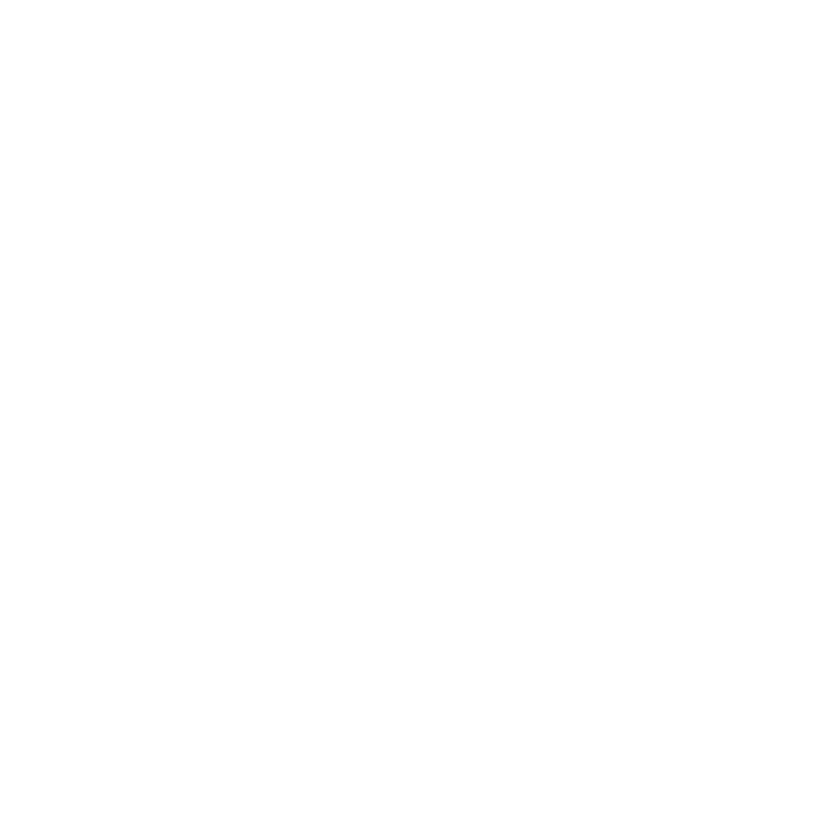

In [17]:
seekViewport('Norm. Enrichment -log10(P-adj) [0-Max]_heatmap_body_1_1')

In [16]:
ComplexHeatmap::draw(heatmapEM, heatmap_legend_side = "bot", annotation_legend_side = "bot")  


ERROR: Error in grid.Call.graphics(C_downvppath, name$path, name$name, strict): Viewport 'Norm. Enrichment -log10(P-adj) [0-Max]_heatmap_body_1_1' was not found


In [26]:
#
plotPDF(heatmapEM, name = "Plus.Motifs-Enriched-Marker-Heatmap_20_predictedGroup.pdf", width = 24, height = 18, ArchRProj = proj_5, addDOC = FALSE)

Plotting ComplexHeatmap!



ERROR: Error in grid.Call.graphics(C_downvppath, name$path, name$name, strict): Viewport 'Norm. Enrichment -log10(P-adj) [0-Max]_heatmap_body_1_1' was not found


## Motif - Enriched
将计算结果输出

In [104]:
getwd()

[1] "/GPFS/Magda_lab_temp/dongmingjie/Project_MJ/Project_1/scATAC"

In [22]:
markerTest <- getMarkerFeatures(ArchRProj  = proj_5, 
                                useMatrix  = "PeakMatrix",
                                groupBy    = "cellcondition",
                                testMethod = "wilcoxon",
                                bias      = c("TSSEnrichment", "log10(nFrags)"),
                                useGroups = paste0('CD8_act','_Post'),
                                bgdGroups = paste0('CD8_act','_Pre'),
                                scaleTo   = 10^4)
saveRDS(markerTest,paste0('/GPFS/Magda_lab_temp/dongmingjie/Project_MJ/Project_1/scATAC/My_Data/scATAC_Data_markerTest_CD8_act.rds'))

In [54]:
scATAC_Data_markerTest_CD8_act    <- readRDS("/GPFS/Magda_lab_temp/dongmingjie/Project_MJ/Project_1/scATAC/My_Data/scATAC_Data_markerTest_CD8_act.rds")
scATAC_Data_markerTest_CD8_eff    <- readRDS("/GPFS/Magda_lab_temp/dongmingjie/Project_MJ/Project_1/scATAC/My_Data/scATAC_Data_markerTest_CD8_eff.rds")
scATAC_Data_markerTest_CD8_ex_act <- readRDS("/GPFS/Magda_lab_temp/dongmingjie/Project_MJ/Project_1/scATAC/My_Data/scATAC_Data_markerTest_CD8_ex_act.rds")
scATAC_Data_markerTest_CD8_ex     <- readRDS("/GPFS/Magda_lab_temp/dongmingjie/Project_MJ/Project_1/scATAC/My_Data/scATAC_Data_markerTest_CD8_ex.rds")
scATAC_Data_markerTest_CD8_mem    <- readRDS("/GPFS/Magda_lab_temp/dongmingjie/Project_MJ/Project_1/scATAC/My_Data/scATAC_Data_markerTest_CD8_mem.rds")
scATAC_Data_markerTest_Naive      <- readRDS("/GPFS/Magda_lab_temp/dongmingjie/Project_MJ/Project_1/scATAC/My_Data/scATAC_Data_markerTest_Naive.rds")
scATAC_Data_markerTest_Tfh        <- readRDS("/GPFS/Magda_lab_temp/dongmingjie/Project_MJ/Project_1/scATAC/My_Data/scATAC_Data_markerTest_Tfh.rds")
scATAC_Data_markerTest_Th17       <- readRDS("/GPFS/Magda_lab_temp/dongmingjie/Project_MJ/Project_1/scATAC/My_Data/scATAC_Data_markerTest_Th17.rds")
scATAC_Data_markerTest_Tregs      <- readRDS("/GPFS/Magda_lab_temp/dongmingjie/Project_MJ/Project_1/scATAC/My_Data/scATAC_Data_markerTest_Tregs.rds")

In [ ]:
motifsUp_CD8_act <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_CD8_act,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC >= 1")
motifsUp_CD8_eff <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_CD8_eff,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC >= 1")
motifsUp_CD8_ex_act <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_CD8_ex_act,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC >= 1")
motifsUp_CD8_ex <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_CD8_ex,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC >= 1")
motifsUp_CD8_mem <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_CD8_mem,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC >= 1")

motifsDo_CD8_act <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_CD8_act,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC <= -1")
motifsDo_CD8_eff <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_CD8_eff,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC <= -1")
motifsDo_CD8_ex_act <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_CD8_ex_act,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC <= -1")
motifsDo_CD8_ex <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_CD8_ex,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC <= -1")
motifsDo_CD8_mem <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_CD8_mem,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC <= -1")

In [ ]:
motifsUp_Naive <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_Naive,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC >= 1")
motifsUp_Tfh <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_Tfh,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC >= 1")
motifsUp_Th17 <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_Th17,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC >= 1")
motifsUp_Tregs <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_Tregs,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC >= 1")

motifsDo_Naive <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_Naive,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC <= -1")
motifsDo_Tfh <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_Tfh,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC <= -1")
motifsDo_Th17 <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_Th17,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC <= -1")
motifsDo_Tregs <- peakAnnoEnrichment(
                                       seMarker  = scATAC_Data_markerTest_Tregs,
                                       ArchRProj = proj_5,
                                       peakAnnotation = "Motif",
                                       cutOff         = "Log2FC <= -1")

In [116]:
df1      <- data.frame(TF = rownames(motifsDo_Naive), mlog10Padj    = assay(motifsDo_Naive)[,1])
df2      <- data.frame(TF = rownames(motifsDo_Tfh),   mlog10Padj    = assay(motifsDo_Tfh)[,1])
df3      <- data.frame(TF = rownames(motifsDo_Th17),  mlog10Padj    = assay(motifsDo_Th17)[,1])
df4      <- data.frame(TF = rownames(motifsDo_Tregs), mlog10Padj    = assay(motifsDo_Tregs)[,1])

df1$Celltype <- 'Naive' 
df2$Celltype <- 'Tfh' 
df3$Celltype <- 'Th17' 
df4$Celltype <- 'Tregs' 
df <- rbind(df1,df2,df3,df4)

df      <- df[order(df$mlog10Padj, decreasing = TRUE),]
df$rank <- seq_len(nrow(df))
dim(df)

In [117]:
write.csv(df,'/GPFS/Magda_lab_temp/dongmingjie/Project_MJ/Project_1/scATAC/My_Data/Motif Enriched CD4 Down.csv')

### ChromVAR偏离富集分析

In [7]:
## Top1
motifs <- c("FOSL1", "RELA", "FUBP1", "CTCFL", "RUNX1", "NR1D1", "FOXO4", "JUNB", "RUNX1",'SMAD5') # UP
# motifs <- c("SP2", "CTCF", "JUN", "CTCFL", "ARID3A", "TWIST1", "BATF", "RUNX1", "SMAD1")   # DOWN
markerMotifs <- getFeatures(proj_5, select = paste(motifs, collapse="|"), useMatrix = "MotifMatrix")

In [9]:
markerMotifs <- grep("z:", markerMotifs, value = TRUE)

In [10]:
markerMotifs

[1] "z:SMAD5_866" "z:FUBP1_809" "z:RUNX1_733" "z:RELA_722"  "z:NR1D1_673"
[6] "z:FOXO4_373" "z:CTCFL_198" "z:FOSL1_142" "z:JUNB_139"

In [53]:
markerMotifs <- c('z:CTCFL_198','z:FOSL1_142','z:FOXO4_373','z:FUBP1_809','z:JUNB_139','z:NR1D1_673','z:RELA_722','z:RUNX1_733','z:SMAD5_866')
markerMotifs

[1] "z:CTCFL_198" "z:FOSL1_142" "z:FOXO4_373" "z:FUBP1_809" "z:JUNB_139" 
[6] "z:NR1D1_673" "z:RELA_722"  "z:RUNX1_733" "z:SMAD5_866"

In [61]:
p <- plotGroups(ArchRProj = proj_5, 
  groupBy = "cellcondition", 
  colorBy = "MotifMatrix", 
  name = markerMotifs,
  pal = pal_cellcondition,
  imputeWeights = getImputeWeights(proj_5))

Getting ImputeWeights

No imputeWeights found, returning NULL

Getting Matrix Values...

2023-07-19 12:14:20 : 

1 
2 
3 
4 
5 
6 
7 


1 
2 
3 
4 
5 
6 
7 
8 
9 




In [ ]:
p <- plotGroups(ArchRProj = proj_5, 
  groupBy = "predictedGroup", 
  colorBy = "MotifMatrix", 
  name = markerMotifs,
  imputeWeights = getImputeWeights(proj_5))

In [62]:
p2 <- lapply(seq_along(p), function(x){
  if(x != 1){
    p[[x]] + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6) +
    theme(plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
    theme(
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank()
    ) + ylab("")
  }else{
    p[[x]] + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6) +
    theme(plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
    theme(
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank()
    ) + ylab("")
  }
})

In [31]:
#plotPDF(p2, name = "0716.Top1.Plot-Groups-Deviations-w-Imputation.pdf", width = 5, height = 5, ArchRProj = proj_5, addDOC = FALSE)

In [56]:
getwd()

[1] "/GPFS/Magda_lab_temp/dongmingjie/Project_MJ/Project_1/scATAC"

In [ ]:
pdf('./proj_5/Fig2D.pdf', width = 18, height = 4)
do.call(cowplot::plot_grid, c(list(nrow = 1, rel_widths = c(2, rep(1, length(p2) - 1))),p2))
dev.off()

***

In [ ]:
p

In [ ]:
p <- plotEmbedding(
    ArchRProj = proj_5, 
    colorBy = "MotifMatrix", 
    name = sort(markerMotifs), 
    embedding = "UMAPHarmony",
    imputeWeights = getImputeWeights(proj_5)
)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )})

In [ ]:
p

In [59]:
pdf('./proj_5/Fig2E.pdf', width = 18, height = 4)
do.call(cowplot::plot_grid, c(list(ncol = 9),p2))
dev.off()

png 
  2

***

In [48]:
markerRNA <- getFeatures(proj_5, select = paste(motifs, collapse="|"), useMatrix = "GeneScoreMatrix")
markerRNA <- markerRNA[markerRNA %ni% c("RUNX1-IT1","SMAD5-AS1","RUNX1T1")]
markerRNA

[1] "FUBP1" "RELA"  "FOSL1" "NR1D1" "JUNB"  "CTCFL" "RUNX1" "SMAD5" "FOXO4"

In [ ]:
# 获取GeneScoreMatrix
p <- plotEmbedding(
    ArchRProj = proj_5, 
    colorBy = "GeneScoreMatrix", 
    name = sort(markerRNA), 
    embedding = "UMAPHarmony",
    imputeWeights = getImputeWeights(proj_5)
)
# 同时处理的多个图
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
#拼图
do.call(cowplot::plot_grid, c(list(ncol = 9),p2))

In [50]:
pdf('./proj_5/Fig2F.pdf', width = 18, height = 4)
do.call(cowplot::plot_grid, c(list(ncol = 9),p2))
dev.off()

png 
  2

***

In [43]:
markerRNA <- getFeatures(proj_5, select = paste(motifs, collapse="|"), useMatrix = "GeneIntegrationMatrix")
markerRNA <- markerRNA[markerRNA %ni% c("RUNX1-IT1","SMAD5-AS1","RUNX1T1")]
markerRNA

[1] "FUBP1" "RELA"  "FOSL1" "NR1D1" "JUNB"  "CTCFL" "RUNX1" "SMAD5" "FOXO4"

In [44]:
p <- plotEmbedding(
    ArchRProj = proj_5, 
    colorBy = "GeneIntegrationMatrix", 
    name = sort(markerRNA), 
    embedding = "UMAPHarmony",
    continuousSet = "blueYellow",
    imputeWeights = getImputeWeights(proj_5)
)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})

In [46]:
pdf('./proj_5/Fig2G.pdf', width = 18, height = 4)
do.call(cowplot::plot_grid, c(list(ncol = 9),p2))
dev.off()

png 
  2

### Motif

In [16]:
ArchRProj_PeakSet <- getPeakSet(ArchRProj = proj_5)
length(ArchRProj_PeakSet)
head(ArchRProj_PeakSet)

[1] 175275

GRanges object with 6 ranges and 13 metadata columns:
             seqnames        ranges strand |     score replicateScoreQuantile
                <Rle>     <IRanges>  <Rle> | <numeric>              <numeric>
   Th17_Post     chr1 751947-752447      * |  11.38268                  0.329
    Tfh_Post     chr1 752464-752964      * |  36.49146                  0.819
    Th17_Pre     chr1 762049-762549      * |   8.97389                  0.563
  Tregs_Post     chr1 762679-763179      * | 141.65105                  0.938
   Th17_Post     chr1 777928-778428      * |   2.81639                  0.245
    Th17_Pre     chr1 779746-780246      * |  18.27059                  0.700
             groupScoreQuantile Reproducibility         GroupReplicate
                      <numeric>       <numeric>            <character>
   Th17_Post              0.131               3 Th17_Post._.SU001_Po..
    Tfh_Post              0.679               3  Tfh_Post._.SU009_Post
    Th17_Pre              0.340       

In [18]:
ArchRProj_Positions <- getPositions(ArchRProj = proj_5, name = NULL, annoName = NULL)
length(ArchRProj_Positions)
head(ArchRProj_Positions)

[1] 870

GRangesList object of length 6:
$TFAP2B_1
GRanges object with 20796 ranges and 1 metadata column:
          seqnames              ranges strand |     score
             <Rle>           <IRanges>  <Rle> | <numeric>
      [1]     chr1       762518-762529      - |   8.60538
      [2]     chr1       873475-873486      + |   8.26861
      [3]     chr1       874977-874988      + |   7.83825
      [4]     chr1       875505-875516      + |  10.02211
      [5]     chr1       875505-875516      - |   8.86118
      ...      ...                 ...    ... .       ...
  [20792]     chrX 154004258-154004269      - |   8.99341
  [20793]     chrX 154299568-154299579      + |   8.70265
  [20794]     chrX 154299568-154299579      - |   7.92782
  [20795]     chrX 154807684-154807695      + |   9.37970
  [20796]     chrX 154807684-154807695      - |  10.41286
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

...
<5 more elements>

In [19]:
ArchRProj_Genome <- getGenome(ArchRProj = proj_5)
length(ArchRProj_Genome)
head(ArchRProj_Genome)

[1] 1

[1] "BSgenome.Hsapiens.UCSC.hg19"

In [20]:
ArchRProj_Peak2GeneLinks <- getPeak2GeneLinks(ArchRProj = proj_5,
                                    corCutOff = 0.45,
                                    FDRCutOff = 1e-04,
                                    varCutOffATAC = 0.25,
                                    varCutOffRNA = 0.25,
                                    resolution = 1,
                                    returnLoops = TRUE)

length(ArchRProj_Peak2GeneLinks)
head(ArchRProj_Peak2GeneLinks)

[1] 1

List of length 1
names(1): Peak2GeneLinks

In [26]:
getAvailableMatrices(proj_5)

[1] "GeneIntegrationMatrix" "GeneScoreMatrix"       "MotifMatrix"          
[4] "PeakMatrix"            "TileMatrix"

In [40]:
ArchRProj_Matrix <- getMatrixFromProject(
                                         ArchRProj = proj_5,
                                         useMatrix = "MotifMatrix",
                                         useSeqnames = NULL,
                                         verbose = TRUE,
                                         binarize = FALSE,
                                         threads = getArchRThreads(),
                                         logFile = createLogFile("getMatrixFromProject"))
length(ArchRProj_Matrix)
head(ArchRProj_Matrix)

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-bb2641ec2628-Date-2023-08-18_Time-03-48-57.log
If there is an issue, please report to github with logFile!

2023-08-18 03:49:47 : Organizing colData, 0.849 mins elapsed.

2023-08-18 03:49:48 : Organizing rowData, 0.863 mins elapsed.

2023-08-18 03:49:48 : Organizing rowRanges, 0.863 mins elapsed.

2023-08-18 03:49:48 : Organizing Assays (1 of 2), 0.863 mins elapsed.

2023-08-18 03:49:49 : Organizing Assays (2 of 2), 0.877 mins elapsed.

2023-08-18 03:49:50 : Constructing SummarizedExperiment, 0.895 mins elapsed.

2023-08-18 03:49:51 : Finished Matrix Creation, 0.903 mins elapsed.



[1] 870

class: SummarizedExperiment 
dim: 6 32751 
metadata(0):
assays(2): deviations z
rownames(6): TFAP2B_1 TFAP2D_2 ... TFAP2A_5 ARID3A_6
rowData names(2): idx name
colnames(32751): SU009_Post#CACAACAAGATGAGGA-1
  SU009_Post#GCTTAAGGTCATTGGT-1 ... SU006_Pre#TAGGAGGGTATTGTCG-1
  SU006_Pre#TGCTCGTAGACGTCAG-1
colData names(99): BlacklistRatio DoubletEnrichment ... Tregs_Th17
  patients

In [59]:
print(proj_5@cellColData)

DataFrame with 32751 rows and 99 columns
                                  Sample TSSEnrichment ReadsInTSS
                                   <Rle>       <array>    <array>
SU009_Post#CACAACAAGATGAGGA-1 SU009_Post         1.117        501
SU009_Post#GCTTAAGGTCATTGGT-1 SU009_Post         2.086       1148
SU009_Post#GGATAGGTCGGGACAA-1 SU009_Post        19.258      16922
SU009_Post#GGGCCATGTTTCGTTT-1 SU009_Post         1.616        391
SU009_Post#TGCATTTAGTCAGGAC-1 SU009_Post          1.41        388
...                                  ...           ...        ...
SU006_Pre#TGTGTCCAGAGTTTGA-1   SU006_Pre         6.733         68
SU006_Pre#CTCTACGTCTTACGGA-1   SU006_Pre         1.089         11
SU006_Pre#GAAGTGGGTAGAATAC-1   SU006_Pre          5.05         51
SU006_Pre#TAGGAGGGTATTGTCG-1   SU006_Pre        18.119        183
SU006_Pre#TGCTCGTAGACGTCAG-1   SU006_Pre        16.931        171
                              ReadsInPromoter ReadsInBlacklist
                                      

In [50]:
ArchRProj_Matrix@colData

DataFrame with 32751 rows and 99 columns
                                   BlacklistRatio  DoubletEnrichment
                                          <array>            <array>
SU009_Post#CACAACAAGATGAGGA-1  0.0165939348739708   1.18181818181818
SU009_Post#GCTTAAGGTCATTGGT-1  0.0114868029760024  0.381818181818182
SU009_Post#GGATAGGTCGGGACAA-1  0.0108801449940145                  0
SU009_Post#GGGCCATGTTTCGTTT-1  0.0103564383375281 0.0181818181818182
SU009_Post#TGCATTTAGTCAGGAC-1  0.0177448311120094  0.963636363636364
...                                           ...                ...
SU006_Pre#TGTGTCCAGAGTTTGA-1  0.00655737704918033                  3
SU006_Pre#CTCTACGTCTTACGGA-1  0.00163934426229508                0.8
SU006_Pre#GAAGTGGGTAGAATAC-1  0.00492610837438424                5.4
SU006_Pre#TAGGAGGGTATTGTCG-1   0.0131795716639209                2.4
SU006_Pre#TGCTCGTAGACGTCAG-1   0.0149006622516556                  7
                                  DoubletScore nDiFrags  nFrag

In [48]:
ArchRProj_Matrix['TFAP2B_1',]

class: SummarizedExperiment 
dim: 1 32751 
metadata(0):
assays(2): deviations z
rownames(1): TFAP2B_1
rowData names(2): idx name
colnames(32751): SU009_Post#CACAACAAGATGAGGA-1
  SU009_Post#GCTTAAGGTCATTGGT-1 ... SU006_Pre#TAGGAGGGTATTGTCG-1
  SU006_Pre#TGCTCGTAGACGTCAG-1
colData names(99): BlacklistRatio DoubletEnrichment ... Tregs_Th17
  patients

In [36]:
head(rownames(ArchRProj_Matrix))

[1] "TFAP2B_1" "TFAP2D_2" "TFAP2C_3" "TFAP2E_4" "TFAP2A_5" "ARID3A_6"

In [28]:
ArchRProj_Fragments <- getFragmentsFromProject(
  ArchRProj = proj_5,
  subsetBy = NULL,
  cellNames = NULL,
  verbose = FALSE,
  logFile = createLogFile("getFragmentsFromProject"))
head(ArchRProj_Fragments)

ArchR logging to : ArchRLogs/ArchR-getFragmentsFromProject-bb26206d0342-Date-2023-08-17_Time-18-47-29.log
If there is an issue, please report to github with logFile!

Reading ArrowFile 1 of 7

Reading ArrowFile 2 of 7

Reading ArrowFile 3 of 7

Reading ArrowFile 4 of 7

Reading ArrowFile 5 of 7

Reading ArrowFile 6 of 7

Reading ArrowFile 7 of 7



List of length 6
names(6): SU009_Post SU009_Pre SU001_Post SU008_Post SU008_Pre SU001_Post2

In [34]:
ArchRProj_Fragments$SU001_Post$RG[1]

character-Rle of length 1 with 1 run
  Lengths:                        1
  Values : "SU001_Post#CCGTAGGAG.."

In [ ]:
 .requirePackage("chromVARmotifs",installInfo='devtools::install_github("GreenleafLab/chromVARmotifs")') 
 data("encode_pwms") 
 motifs <- encode_pwms 
 obj <- .summarizeChromVARMotifs(motifs) 

### TF Plot

In [14]:
TF_870

[1] "TFAP2B_1"            "TFAP2D_2"            "TFAP2C_3"           
  [4] "TFAP2E_4"            "TFAP2A_5"            "ARID3A_6"           
  [7] "ARID5B_7"            "ARID3B_8"            "ARID5A_9"           
 [10] "ARID3C_10"           "ARID2_11"            "HMGA1_12"           
 [13] "HMGA2_13"            "MAX_14"              "MLXIPL_15"          
 [16] "ARNTL2_16"           "AHRR_17"             "TFE3_18"            
 [19] "HES2_19"             "MNT_20"              "TCF3_21"            
 [22] "SREBF1_22"           "TFAP4_23"            "HIF1A_24"           
 [25] "TCFL5_25"            "USF2_26"             "TFEC_27"            
 [28] "AHR_28"              "MLX_29"              "MYF6_30"            
 [31] "SIM1_31"             "TFEB_32"             "HAND1_33"           
 [34] "HES1_34"             "ID2_35"              "EPAS1_36"           
 [37] "MYCL1_37"            "ID3_38"              "TCF21_39"           
 [40] "MXI1_40"             "MYOG_41"             "TWIST1_42"          
 [43] "NEUROG3_43"          "BHLHE41_44"          "BHLHE23_45"         
 [46] "TCF15_46"            "ID1_47"              "MYOD1_48"           
 [49] "NPAS1_49"            "ARNTL_50"            "BHLHE40_51"         
 [52] "MYCN_52"             "CLOCK_53"            "HEY2_54"            
 [55] "MYC_55"              "TCF12_56"            "ARNT_57"            
 [58] "FERD3L_58"           "NPAS3_59"            "USF1_60"            
 [61] "SIM2_61"             "TAL1_62"             "NEUROD1_63"         
 [64] "TCF23_64"            "HEYL_65"             "HAND2_66"           
 [67] "EBF1_67"             "HEY1_68"             "MESP1_69"           
 [70] "PTF1A_70"            "ATOH8_71"            "NPAS2_72"           
 [73] "NEUROD2_73"          "NHLH1_74"            "ID4_75"             
 [76] "ARNT2_76"            "NPAS4_77"            "MLXIP_78"           
 [79] "OLIG3_79"            "NHLH2_80"            "NEUROG2_81"         
 [82] "MSC_82"              "HES7_83"             "ATOH7_84"           
 [85] "BHLHA15_85"          "BHLHE22_86"          "NEUROG1_87"         
 [88] "FIGLA_88"            "ASCL2_89"            "OLIG1_90"           
 [91] "MITF_91"             "ENSG00000187728_92"  "SCXB_93"            
 [94] "MESP2_94"            "HES4_95"             "SCXA_96"            
 [97] "TCF4_97"             "HES5_98"             "SREBF2_99"          
[100] "OLIG2_100"           "TWIST2_101"          "ENSG00000250811_102"
[103] "MGA_103"             "CREB3L3_104"         "FOSL2_105"          
[106] "NFE2L1_106"          "CEBPE_107"           "CREM_108"           
[109] "XBP1_109"            "DBP_110"             "CREB3_111"          
[112] "HLF_112"             "BACH2_113"           "ATF2_114"           
[115] "NFE2L2_115"          "ATF6_116"            "CREB1_117"          
[118] "ATF1_118"            "NFE2_119"            "BATF3_120"          
[121] "FOSB_121"            "ATF4_122"            "NRL_123"            
[124] "JUND_124"            "JDP2_125"            "CREB3L4_126"        
[127] "CREB5_127"           "CEBPG_128"           "BATF_129"           
[130] "BACH1_130"           "CREB3L1_131"         "ATF3_132"           
[133] "NFIL3_133"           "TEF_134"             "CR7538031_135"      
[136] "ATF5_136"            "FOS_137"             "ATF7_138"           
[139] "JUNB_139"            "CEBPB_140"           "DDIT3_141"          
[142] "FOSL1_142"           "JUN_143"             "MAF_144"            
[145] "CREB3L2_145"         "MAFA_146"            "MAFF_147"           
[148] "MAFG_148"            "MAFK_149"            "MAFB_150"           
[151] "ATF6B_151"           "CEBPD_152"           "CR9257962_153"      
[154] "AL6628286_154"       "CEBPA_155"           "ENSG00000250542_156"
[157] "ZEB1_157"            "ZFX_158"             "ZNF263_159"         
[160] "HIVEP2_160"          "SNAI2_161"           "ZIC2_162"           
[163] "PRDM1_163"           "ZNF76_164"           "KLF6_165"           
[166] "ZFY_166"             "GLI2_167"    

In [8]:
library(seqLogo)

In [9]:
PWMatrixToProbMatrix <- function(x){
if (class(x) != "PWMatrix") stop("x must be a TFBSTools::PWMatrix object")
m <- (exp(as(x, "matrix"))) * TFBSTools::bg(x)/sum(TFBSTools::bg(x))
m <- t(t(m)/colSums(m))
m
}

[1] "Yes, found: IKZF4_197"


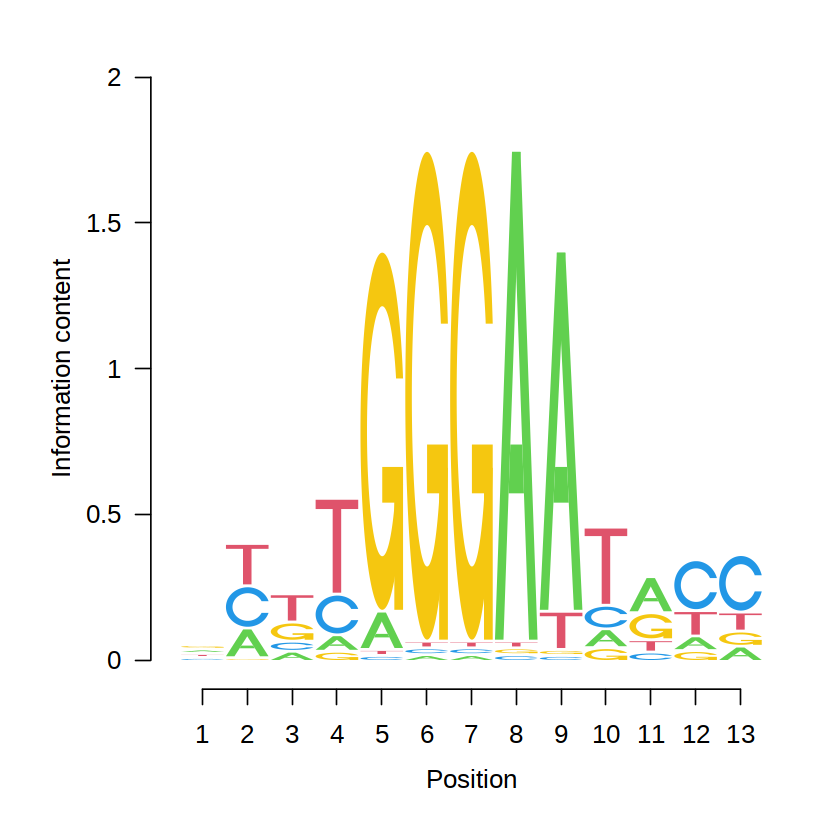

In [30]:
temp <- getPeakAnnotation(proj_5, "Motif")$motifs
TF_870 <- names(temp)

#############################
TargetCharacter <- "IKZF4_197" ###
#############################

index <- grep(TargetCharacter, TF_870, value = TRUE)
if (length(index) > 0) {
  print(paste("Yes, found:", index))
} else {
  print('No')
}

seqLogo::seqLogo(PWMatrixToProbMatrix(getPeakAnnotation(proj_5, "Motif")$motifs[[index]]))

In [31]:
idxPass   <- which(proj_5$preorpost == "Pre")
cellsPass <- proj_5$cellNames[idxPass]
Sub_Pre   <- proj_5[cellsPass, ]

idxPass   <- which(proj_5$preorpost == "Post")
cellsPass <- proj_5$cellNames[idxPass]
Sub_Post  <- proj_5[cellsPass, ]

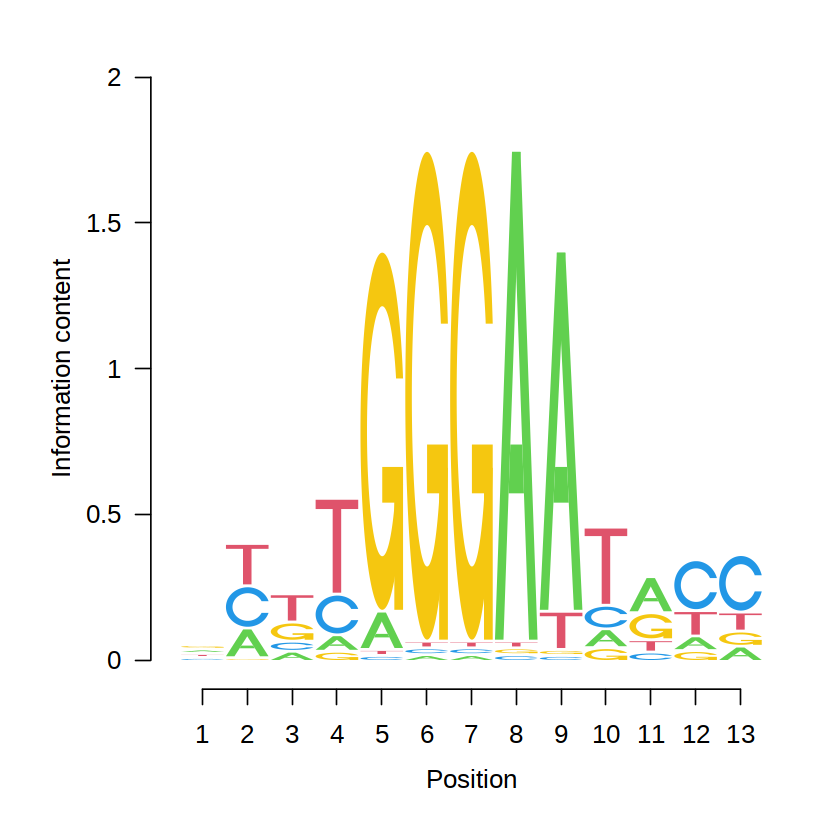

logical(0)

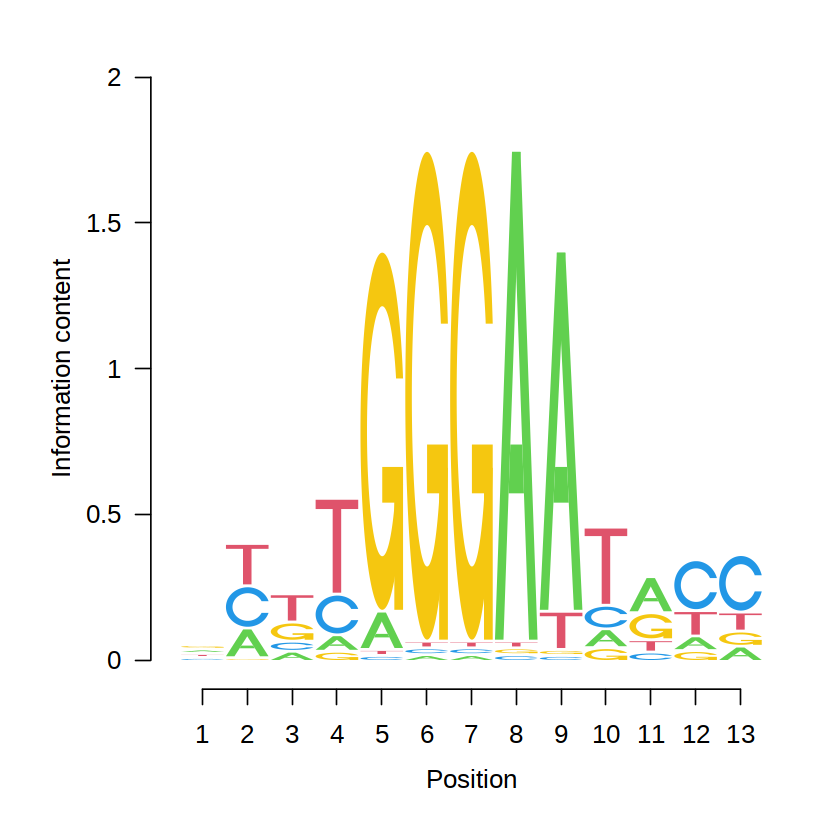

In [38]:
seqLogo::seqLogo(PWMatrixToProbMatrix(getPeakAnnotation(Sub_Pre , "Motif")$motifs[[index]]))
seqLogo::seqLogo(PWMatrixToProbMatrix(getPeakAnnotation(Sub_Post, "Motif")$motifs[[index]]))

In [19]:
PWMatrixToProbMatrix(getPeakAnnotation(Sub_Pre , "Motif")$motifs[[TF_870[5]]])
PWMatrixToProbMatrix(getPeakAnnotation(Sub_Post, "Motif")$motifs[[TF_870[5]]])

A,0.31918765,0.03192381,0.007751938,0.007751938,0.01377506,0.11272001,0.67212033,0.157579311,0.007751938,0.01335618,0.3482136
C,0.36172254,0.17854300,0.952021366,0.926227183,0.30817786,0.49735955,0.18935813,0.040915309,0.013377174,0.86212831,0.1534294
G,0.05831917,0.77348871,0.032474758,0.009654976,0.12784930,0.30221021,0.12054855,0.793753442,0.971118950,0.11296714,0.2441583
T,0.26077064,0.01604448,0.007751938,0.056365904,0.55019778,0.08771023,0.01797299,0.007751938,0.007751938,0.01154836,0.2541987


A,0.31918765,0.03192381,0.007751938,0.007751938,0.01377506,0.11272001,0.67212033,0.157579311,0.007751938,0.01335618,0.3482136
C,0.36172254,0.17854300,0.952021366,0.926227183,0.30817786,0.49735955,0.18935813,0.040915309,0.013377174,0.86212831,0.1534294
G,0.05831917,0.77348871,0.032474758,0.009654976,0.12784930,0.30221021,0.12054855,0.793753442,0.971118950,0.11296714,0.2441583
T,0.26077064,0.01604448,0.007751938,0.056365904,0.55019778,0.08771023,0.01797299,0.007751938,0.007751938,0.01154836,0.2541987


In [27]:
idxPass   <- which(proj_5$predictedGroup == "CD8_act")
cellsPass <- proj_5$cellNames[idxPass]
Sub_Pre   <- proj_5[cellsPass, ]

idxPass   <- which(proj_5$predictedGroup == "CD8_act")
cellsPass <- proj_5$cellNames[idxPass]
Sub_Post  <- proj_5[cellsPass, ]

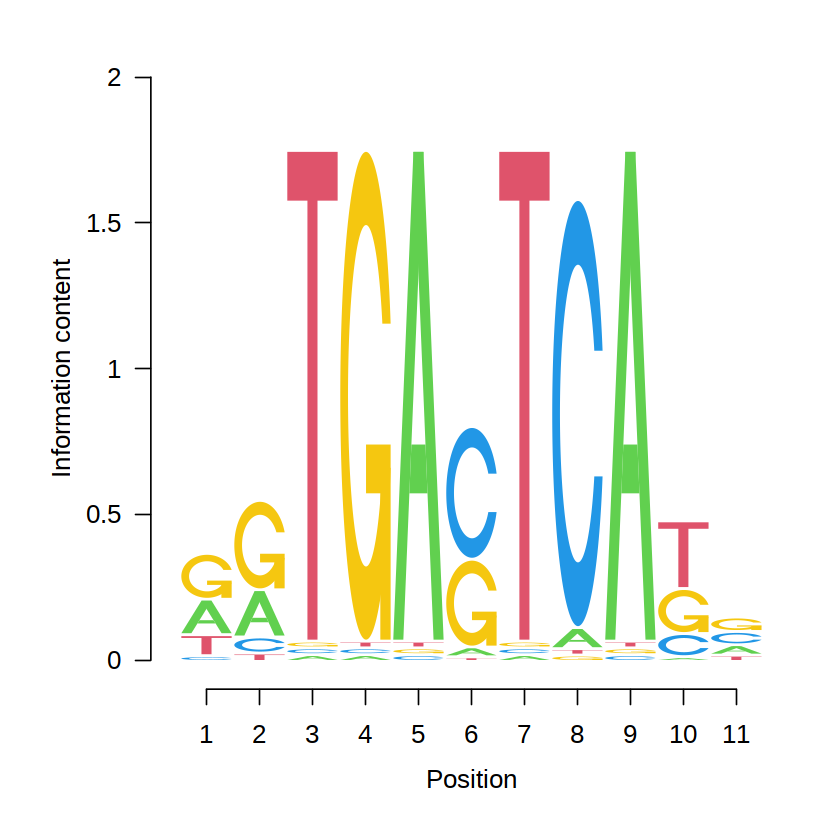

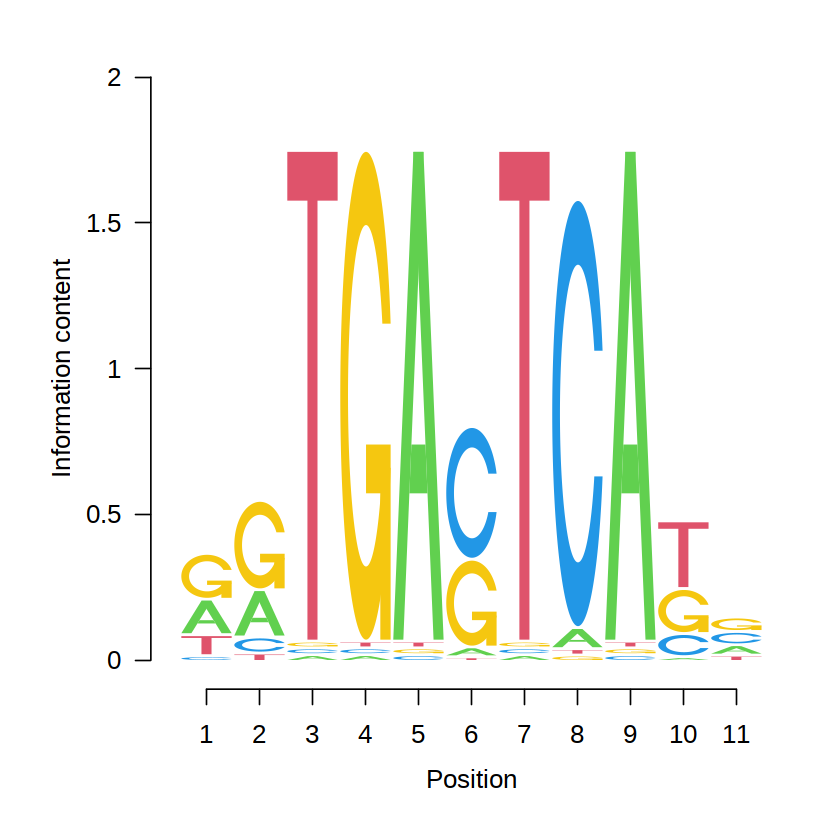

In [28]:
seqLogo::seqLogo(PWMatrixToProbMatrix(getPeakAnnotation(Sub_Pre , "Motif")$motifs[[index]]))
seqLogo::seqLogo(PWMatrixToProbMatrix(getPeakAnnotation(Sub_Post, "Motif")$motifs[[index]]))

In [22]:
getPeakAnnotation(Sub_Pre , "Motif")$motifs[[index]]

An object of class PWMatrix
ID: ENSG00000137203_LINE29_TFAP2A_D_N3
Name: TFAP2A
Matrix Class: Unknown
strand: *
Pseudocounts: 
Tags: 
$ensembl
[1] "ENSG00000137203"

Background: 
   A    C    G    T 
0.25 0.25 0.25 0.25 
Matrix: 
         [,1]       [,2]      [,3]      [,4]       [,5]       [,6]       [,7]
A  0.24431827 -2.0581087 -3.473518 -3.473518 -2.8986014 -0.7965539  0.9889765
C  0.36941654 -0.3366315  1.337127  1.309659  0.2092162  0.6878523 -0.2778208
G -1.45553011  1.1294502 -2.040998 -3.253988 -0.6706087  0.1896619 -0.7294083
T  0.04218032 -2.7460961 -3.473518 -1.489596  0.7888169 -1.0474224 -2.6325908
       [,8]      [,9]      [,10]       [,11]
A -0.461532 -3.473518 -2.9294814  0.33135519
C -1.809957 -2.927911  1.2379432 -0.48822058
G  1.155312  1.356988 -0.7943639 -0.02364414
T -3.473518 -3.473518 -3.0749172  0.01665542

In [23]:
getPeakAnnotation(Sub_Post , "Motif")$motifs[[index]]

An object of class PWMatrix
ID: ENSG00000137203_LINE29_TFAP2A_D_N3
Name: TFAP2A
Matrix Class: Unknown
strand: *
Pseudocounts: 
Tags: 
$ensembl
[1] "ENSG00000137203"

Background: 
   A    C    G    T 
0.25 0.25 0.25 0.25 
Matrix: 
         [,1]       [,2]      [,3]      [,4]       [,5]       [,6]       [,7]
A  0.24431827 -2.0581087 -3.473518 -3.473518 -2.8986014 -0.7965539  0.9889765
C  0.36941654 -0.3366315  1.337127  1.309659  0.2092162  0.6878523 -0.2778208
G -1.45553011  1.1294502 -2.040998 -3.253988 -0.6706087  0.1896619 -0.7294083
T  0.04218032 -2.7460961 -3.473518 -1.489596  0.7888169 -1.0474224 -2.6325908
       [,8]      [,9]      [,10]       [,11]
A -0.461532 -3.473518 -2.9294814  0.33135519
C -1.809957 -2.927911  1.2379432 -0.48822058
G  1.155312  1.356988 -0.7943639 -0.02364414
T -3.473518 -3.473518 -3.0749172  0.01665542